In this project, we will predict whether a patient will have a heart stroke or not based on his/her comorbidities, work, and lifestyle.

Dataset details
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.read_csv('C:/Users/omola/Downloads/healthcare-dataset-stroke-data.csv')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
stroke_data = pd.read_csv('C:/Users/omola/Downloads/healthcare-dataset-stroke-data.csv')

In [4]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

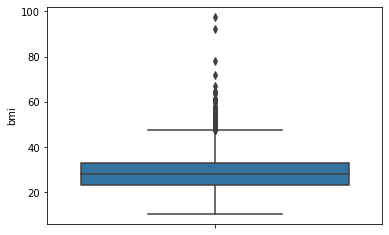

In [6]:
sns.boxplot(data=stroke_data, y='bmi')
plt.show()

In [7]:
stroke_data['bmi'] = stroke_data['bmi'].fillna(stroke_data['bmi'].median())

In [8]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
df = stroke_data.drop(['id'], axis=1)

# Checking for outliers

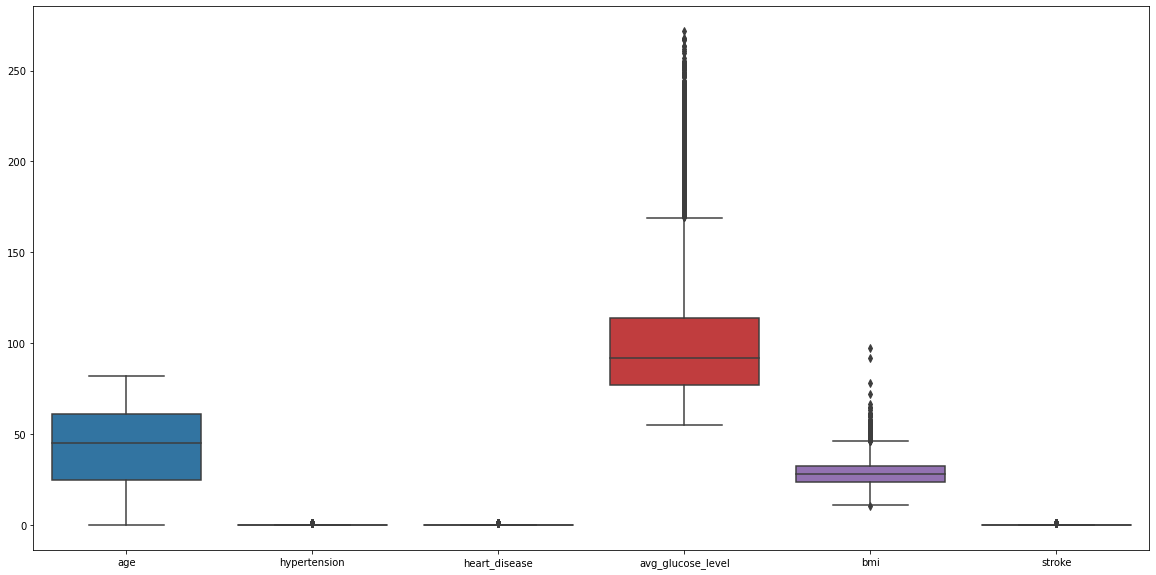

In [12]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df)
plt.show()

In [13]:
#outliers found in bmi and avgerage glucose level

outlier in average glucose level 271.74


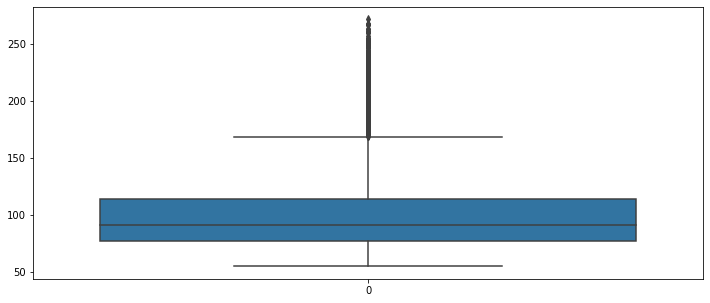

In [14]:
print('outlier in average glucose level', stroke_data['avg_glucose_level'].max())
plt.figure(figsize=(12,5), facecolor='w')
sns.boxplot(data=stroke_data['avg_glucose_level'])
plt.show()

outlier in bmi 97.6


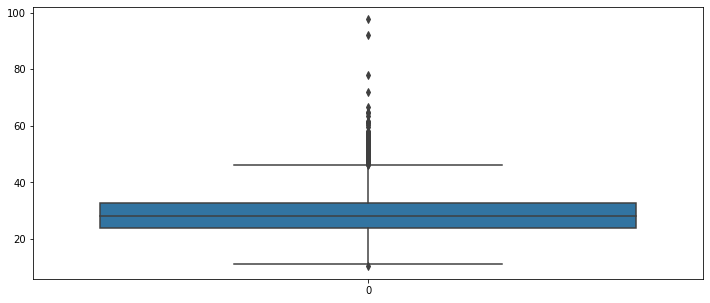

In [15]:
print('outlier in bmi', stroke_data['bmi'].max())
plt.figure(figsize=(12,5), facecolor='w')
sns.boxplot(data=stroke_data['bmi'])
plt.show()

# Exploratory data analysis

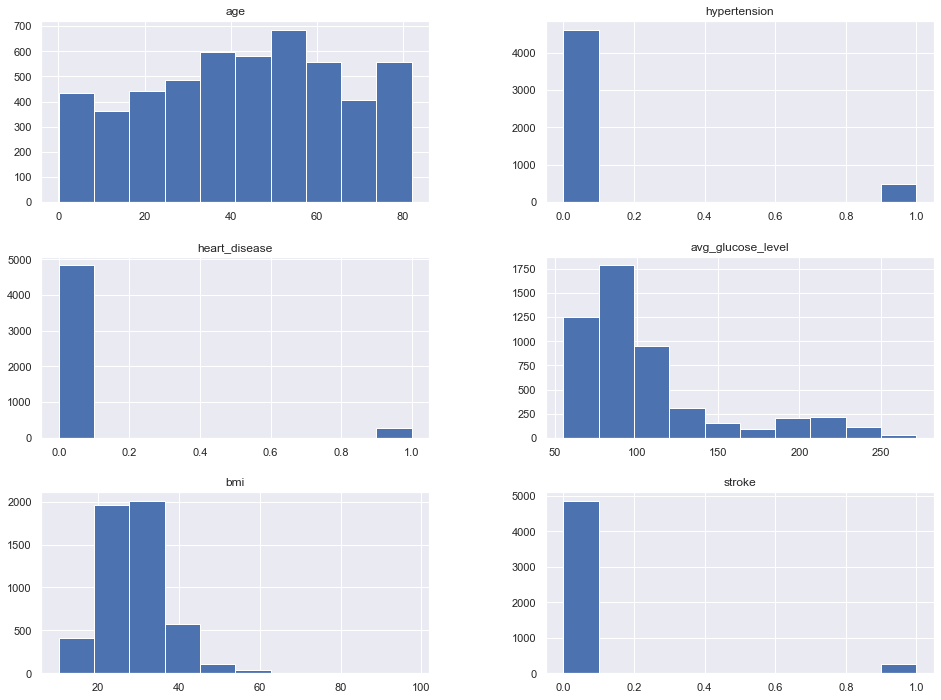

In [16]:
sns.set(style='darkgrid')

df.hist(bins=10, figsize=(16,12))

plt.show()

from the histogram which shows the distribution of the data set, most of the bmi data is spread between 10-50, the data is heavily skewed to the left. Most of the people with stroke have thier bmi between 20-50 

hypertension and heart_disease has a highly uneven distribution with the most data present in 0

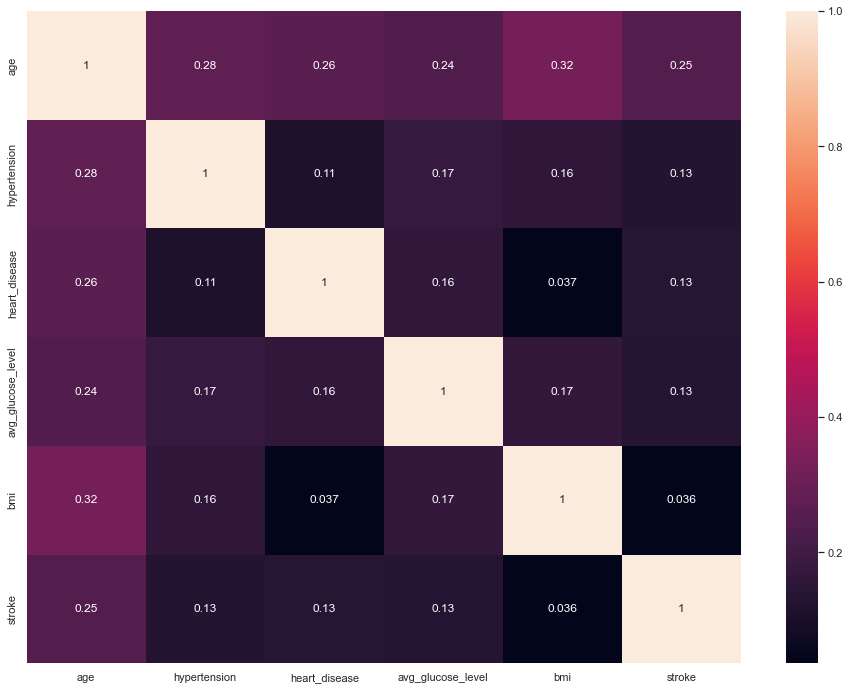

In [17]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Univariate analysis

In [158]:
cat_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'smoking_status']
for features in cat_features:
    print(df[features].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
0    4612
1     498
Name: hypertension, dtype: int64
0    4834
1     276
Name: heart_disease, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


# Feature selection

In [18]:
stroke_data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [19]:
from sklearn.feature_selection import SelectKBest #to select the best features with respect to the output
from sklearn.utils import resample #to handle imbalanced data as seen under univarate analysis
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

In [25]:
one_hot_encoded_training_predictors = pd.get_dummies(df)
df=one_hot_encoded_training_predictors 

In [26]:
X=df.iloc[:,0:11]
y=df.iloc[:,-1]
print("X - ", X.shape, "\ny - ", y.shape)

X -  (5110, 11) 
y -  (5110,)


In [22]:
#Apply SelectKBest
best=SelectKBest(score_func=chi2, k=10)
fit=best.fit(X,y)

In [29]:
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)

In [30]:
scores=pd.concat([df_columns,df_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

              Feature       Score
1        hypertension  323.235647
5              stroke   74.738580
0                 age   63.124133
10   ever_married_Yes   37.126435
4                 bmi   30.730960
3   avg_glucose_level    9.379641
2       heart_disease    4.501022
8        gender_Other    0.394505
6       gender_Female    0.388439
7         gender_Male    0.270499
9     ever_married_No    0.182597


In [31]:
#Select 10 features
features=scores["Feature"].tolist()[:10]
features

['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke',
 'gender_Female',
 'gender_Male',
 'gender_Other',
 'ever_married_No']

# Feature splitting and scaling

In [32]:
y = df['stroke']
X = df.drop(['stroke'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [33]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

# Predictive modeling

In [34]:
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
model = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_conf_matrix = confusion_matrix(test_y, lr_predict)
lr_acc_score = accuracy_score(test_y, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(test_y,lr_predict))

confussion matrix
[[1938    0]
 [ 106    0]]


Accuracy of Logistic Regression: 94.81409001956948 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1938
           1       0.00      0.00      0.00       106

    accuracy                           0.95      2044
   macro avg       0.47      0.50      0.49      2044
weighted avg       0.90      0.95      0.92      2044



In [35]:
m2 = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(train_x, train_y)
knn_predict = knn.predict(test_x)
knn_conf_matrix = confusion_matrix(test_y, knn_predict)
knn_acc_score = accuracy_score(test_y, knn_predict)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
print(classification_report(test_y, knn_predict))

confussion matrix
[[1867   71]
 [  94   12]]


Accuracy of k-NN Classification: 91.92759295499022 

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1938
           1       0.14      0.11      0.13       106

    accuracy                           0.92      2044
   macro avg       0.55      0.54      0.54      2044
weighted avg       0.91      0.92      0.91      2044



In [36]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)
rf.fit(train_x,train_y)
rf_predicted = rf.predict(test_x)
rf_conf_matrix = confusion_matrix(test_y, rf_predicted)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(test_y,rf_predicted))

confussion matrix
[[1935    3]
 [ 105    1]]


Accuracy of Random Forest: 94.71624266144813 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1938
           1       0.25      0.01      0.02       106

    accuracy                           0.95      2044
   macro avg       0.60      0.50      0.50      2044
weighted avg       0.91      0.95      0.92      2044



In [37]:
m4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30)
dt.fit(train_x,train_y)
dt_predicted = dt.predict(test_x)
dt_conf_matrix = confusion_matrix(test_y, dt_predicted)
dt_acc_score = accuracy_score(test_y, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(test_y,dt_predicted))

confussion matrix
[[1856   82]
 [  91   15]]


Accuracy of DecisionTreeClassifier: 91.53620352250489 

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1938
           1       0.15      0.14      0.15       106

    accuracy                           0.92      2044
   macro avg       0.55      0.55      0.55      2044
weighted avg       0.91      0.92      0.91      2044



In [38]:
m5 = 'Gradient Boosting Classifier'
gvc =  GradientBoostingClassifier()
gvc.fit(train_x,train_y)
gvc_predicted = gvc.predict(test_x)
gvc_conf_matrix = confusion_matrix(test_y, gvc_predicted)
gvc_acc_score = accuracy_score(test_y, gvc_predicted)
print("confussion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:",gvc_acc_score*100,'\n')
print(classification_report(test_y,gvc_predicted))

confussion matrix
[[1926   12]
 [  98    8]]


Accuracy of Gradient Boosting Classifier: 94.6183953033268 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1938
           1       0.40      0.08      0.13       106

    accuracy                           0.95      2044
   macro avg       0.68      0.53      0.55      2044
weighted avg       0.92      0.95      0.93      2044



# Model comparison

In [40]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','K-Nearest Neighbour','Random Forest',
                                   'Decision Tree','Gradient Boosting'], 
                         'Accuracy': [lr_acc_score*100, knn_acc_score*100, rf_acc_score*100, dt_acc_score*100,gvc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,94.814090
1,K-Nearest Neighbour,91.927593
2,Random Forest,94.716243
3,Decision Tree,91.536204
4,Gradient Boosting,94.618395


In [ ]:
Logistic regression model has the highest accuracy followed by Random forest and Gradient Boosting